In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Scalers
from sklearn.preprocessing import StandardScaler
#Importing train, test split library
from sklearn.model_selection import train_test_split
# Libraries to test model on different thresholds
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
#load dataset
train = pd.read_csv('/content/drive/MyDrive/Competition/American Express/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Competition/American Express/dataset/test.csv')

In [ ]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  object 
 4   owns_car                 11251 non-null  object 
 5   owns_house               11383 non-null  object 
 6   no_of_children           11193 non-null  float64
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11278 non-null  float64
 9   occupation_type          11383 non-null  object 
 10  total_family_members     11352 non-null  float64
 11  migrant_worker           11357 non-null  float64
 12  yearly_debt_payments     11361 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

In [ ]:
#describe the stats. of dataset 
train.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [ ]:
#check for null values 
train.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [ ]:
test.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [ ]:
test1 = test.copy()


In [ ]:
test1 = test1.drop(['customer_id','name'],axis=1)

In [ ]:
print(train['age'].value_counts())
print(test1['age'].value_counts())

40    1455
55    1448
36    1420
23    1411
35    1410
37    1409
49    1408
26    1399
48    1396
29    1395
27    1395
53    1385
45    1385
30    1384
54    1383
32    1380
50    1377
43    1375
25    1373
31    1373
51    1371
24    1369
28    1368
46    1364
41    1362
44    1356
34    1355
42    1350
39    1349
52    1345
33    1339
38    1325
47    1314
Name: age, dtype: int64
47    392
49    376
36    370
41    367
27    362
25    360
55    359
44    356
51    350
23    349
24    347
54    347
53    346
26    346
31    344
52    343
40    343
46    342
29    342
37    341
42    341
33    339
48    339
30    338
50    336
35    333
45    332
38    329
28    329
43    328
32    323
34    318
39    316
Name: age, dtype: int64


In [ ]:
train.loc[train.age <= 25, 'age'] = 0
train.loc[(train.age > 25) & (train.age <= 30), 'age'] = 1
train.loc[(train.age > 30) & (train.age <= 35), 'age'] = 2
train.loc[(train.age > 35) & (train.age <= 40), 'age'] = 3
train.loc[(train.age > 40) & (train.age <= 45), 'age'] = 4
train.loc[(train.age > 45) & (train.age <= 50), 'age'] = 5
train.loc[train.age > 50, 'age'] = 6

In [ ]:
test1.loc[test1.age <= 25, 'age'] = 0
test1.loc[(test1.age > 25) & (test1.age <= 30), 'age'] = 1
test1.loc[(test1.age > 30) & (test1.age <= 35), 'age'] = 2
test1.loc[(test1.age > 35) & (test1.age <= 40), 'age'] = 3
test1.loc[(test1.age > 40) & (test1.age <= 45), 'age'] = 4
test1.loc[(test1.age > 45) & (test1.age <= 50), 'age'] = 5
test1.loc[test1.age > 50, 'age'] = 6

In [ ]:
test1['age'].value_counts()

5    1785
6    1745
4    1724
1    1717
3    1699
2    1657
0    1056
Name: age, dtype: int64

In [ ]:
train['age'].value_counts()

3    6958
1    6941
6    6932
5    6859
2    6857
4    6828
0    4153
Name: age, dtype: int64

In [ ]:
print(train['gender'].value_counts())
print(test1['gender'].value_counts())

F      29957
M      15570
XNA        1
Name: gender, dtype: int64
F      7443
M      3939
XNA       1
Name: gender, dtype: int64


In [ ]:
train["gender"].replace({'XNA': 'M'}, inplace=True)
test1["gender"].replace({'XNA': 'M'}, inplace=True)

In [ ]:
print(train['gender'].value_counts())
print(test1['gender'].value_counts())

F    29957
M    15571
Name: gender, dtype: int64
F    7443
M    3940
Name: gender, dtype: int64


In [ ]:
print(train['owns_car'].value_counts())
print(test1['owns_car'].value_counts())

N    29743
Y    15238
Name: owns_car, dtype: int64
N    7372
Y    3879
Name: owns_car, dtype: int64


In [ ]:
print(train['owns_house'].value_counts())
print(test1['owns_house'].value_counts())

Y    31642
N    13886
Name: owns_house, dtype: int64
Y    7861
N    3522
Name: owns_house, dtype: int64


In [ ]:
print(train['no_of_children'].value_counts())
print(test1['no_of_children'].value_counts())

0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
9.0        1
8.0        1
Name: no_of_children, dtype: int64
0.0     7825
1.0     2248
2.0      957
3.0      138
4.0       19
5.0        4
11.0       1
7.0        1
Name: no_of_children, dtype: int64


In [ ]:
print(train['net_yearly_income'].value_counts())
print(test1['net_yearly_income'].value_counts())

226438.59    2
151482.74    2
346111.39    2
122855.68    2
156802.98    2
            ..
168476.83    1
96113.87     1
78780.28     1
144938.71    1
199803.14    1
Name: net_yearly_income, Length: 45502, dtype: int64
105968.50    2
148537.51    2
262210.17    2
238926.50    1
186889.54    1
            ..
82918.95     1
330409.15    1
167853.72    1
189332.85    1
157245.07    1
Name: net_yearly_income, Length: 11380, dtype: int64


In [ ]:
print(train['no_of_days_employed'].value_counts())
print(test1['no_of_days_employed'].value_counts())

365246.0    684
365244.0    669
365240.0    641
365245.0    631
365241.0    628
           ... 
8032.0        1
3809.0        1
13551.0       1
9941.0        1
7168.0        1
Name: no_of_days_employed, Length: 7874, dtype: int64
365248.0    166
365252.0    162
365247.0    159
365249.0    158
365245.0    155
           ... 
8069.0        1
8841.0        1
7563.0        1
4262.0        1
4615.0        1
Name: no_of_days_employed, Length: 4558, dtype: int64


In [ ]:
print(train['occupation_type'].value_counts())
print(test1['occupation_type'].value_counts())

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64
Unknown                  3546
Laborers                 2071
Sales staff              1176
Core staff               1018
Managers                  806
Drivers                   703
High skill tech staff     405
Accountants               365
Medicine staff            318
Security staff            252
Cooking staff             208
Cleaning staff            164
Private service

In [ ]:
print(train['total_family_members'].value_counts())
print(test1['total_family_members'].value_counts())

2.0     23455
1.0      9913
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
10.0        2
9.0         1
Name: total_family_members, dtype: int64
2.0     5835
1.0     2493
3.0     1961
4.0      907
5.0      131
6.0       19
7.0        4
13.0       1
9.0        1
Name: total_family_members, dtype: int64


In [ ]:
print(train['migrant_worker'].value_counts())
print(test1['migrant_worker'].value_counts())

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64
0.0    9335
1.0    2022
Name: migrant_worker, dtype: int64


In [ ]:
print(train['yearly_debt_payments'].value_counts())
print(test1['yearly_debt_payments'].value_counts())

33269.97    2
29306.10    2
11275.07    2
27497.12    2
22581.09    2
           ..
12161.70    1
40953.20    1
42868.81    1
36174.76    1
56811.56    1
Name: yearly_debt_payments, Length: 45251, dtype: int64
23868.46    2
31926.24    2
29182.01    2
27502.13    2
22969.23    2
           ..
21577.76    1
57190.94    1
77039.08    1
36849.31    1
7424.00     1
Name: yearly_debt_payments, Length: 11346, dtype: int64


In [ ]:
print(train['credit_limit'].value_counts())
print(test1['credit_limit'].value_counts())

20924.04    2
32276.24    2
28630.14    2
40961.39    2
16100.63    2
           ..
87179.43    1
40509.30    1
46200.98    1
22644.20    1
36864.00    1
Name: credit_limit, Length: 45371, dtype: int64
34315.66    2
42264.65    2
27577.23    2
29033.86    2
31620.14    2
           ..
33104.11    1
40320.82    1
33448.25    1
31560.23    1
26007.12    1
Name: credit_limit, Length: 11372, dtype: int64


In [ ]:
print(train['credit_limit_used(%)'].value_counts())
print(test1['credit_limit_used(%)'].value_counts())

90    584
81    571
87    569
89    568
84    566
     ... 
1     389
68    381
43    378
27    374
52    367
Name: credit_limit_used(%), Length: 100, dtype: int64
94    155
72    149
82    147
87    146
75    146
     ... 
50     89
62     88
14     87
46     87
44     85
Name: credit_limit_used(%), Length: 100, dtype: int64


In [ ]:
print(train['credit_score'].value_counts())
print(test1['credit_score'].value_counts())

670.0    186
660.0    183
684.0    176
682.0    175
651.0    175
        ... 
538.0     11
504.0     11
623.0     11
500.0     11
529.0     10
Name: credit_score, Length: 450, dtype: int64
665.0    60
872.0    57
660.0    54
723.0    52
672.0    52
         ..
556.0     1
541.0     1
504.0     1
580.0     1
597.0     1
Name: credit_score, Length: 449, dtype: int64


In [ ]:
print(train['prev_defaults'].value_counts())
print(test1['prev_defaults'].value_counts())

0    43060
1     2172
2      296
Name: prev_defaults, dtype: int64
0    10796
1      513
2       74
Name: prev_defaults, dtype: int64


In [ ]:
print(train['default_in_last_6months'].value_counts())
print(test1['default_in_last_6months'].value_counts())

0    43227
1     2301
Name: default_in_last_6months, dtype: int64
0    10829
1      554
Name: default_in_last_6months, dtype: int64


In [ ]:
print(train['credit_card_default'].value_counts())

0    41831
1     3697
Name: credit_card_default, dtype: int64


In [ ]:
# #deal with null values

train['owns_car'] = train['owns_car'].fillna('Y')
train['no_of_children'] = train['no_of_children'].fillna(1.0)
train['no_of_days_employed'] = train['no_of_days_employed'].fillna(train['no_of_days_employed'].mean())
train['total_family_members'] = train['total_family_members'].fillna(2.0)
train['migrant_worker'] = train['migrant_worker'].fillna(1.0)
train['yearly_debt_payments'] = train['yearly_debt_payments'].fillna(train['yearly_debt_payments'].mean())
train['credit_score'] = train['credit_score'].fillna(train['credit_score'].median())


test1['owns_car'] = test1['owns_car'].fillna('Y')
test1['no_of_children'] = test1['no_of_children'].fillna(1.0)
test1['no_of_days_employed'] = test1['no_of_days_employed'].fillna(test1['no_of_days_employed'].mean())
test1['total_family_members'] = test1['total_family_members'].fillna(2.0)
test1['migrant_worker'] = test1['migrant_worker'].fillna(1.0)
test1['yearly_debt_payments'] = test1['yearly_debt_payments'].fillna(test1['yearly_debt_payments'].mean())
test1['credit_score'] = test1['credit_score'].fillna(test1['credit_score'].median())

In [ ]:
code_numeric = {'M': 1, 'F': 2,
'Y': 1, 'N': 2,'Unknown': 1,'Laborers': 2,'Sales staff': 3,'Core staff': 4,'Managers':5,
'Drivers':6,'High skill tech staff':7,'Accountants':8,'Medicine staff':9,'Security staff':10,'Cooking staff':11,'Cleaning staff':12,
'Private service staff':13,'Low-skill Laborers':14,'Waiters/barmen staff':15,'Secretaries':16,'Realty agents':17,'HR staff':18,'IT staff':19}
train = train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test1 =  test1.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [ ]:
train[['no_of_children','total_family_members','migrant_worker']]=train[['no_of_children','total_family_members','migrant_worker']].astype(int)
test1[['no_of_children','total_family_members','migrant_worker']]=test1[['no_of_children','total_family_members','migrant_worker']].astype(int)


In [ ]:
train

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,5,2,2,1,0,107934.04,612.0,1,1,1,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,1,1,2,1,0,109862.62,2771.0,2,2,0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,3,1,2,1,0,230153.17,204.0,2,2,0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,3,2,2,1,0,122325.82,11941.0,4,2,0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,5,1,1,1,0,387286.00,1459.0,4,1,0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,6,2,2,2,2,96207.57,117.0,1,4,0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,2,2,2,1,0,383476.74,966.0,8,2,1,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,1,2,2,1,0,260052.18,1420.0,4,2,0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,2,1,1,2,0,157363.04,2457.0,2,2,0,20150.10,25538.72,92,805.0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


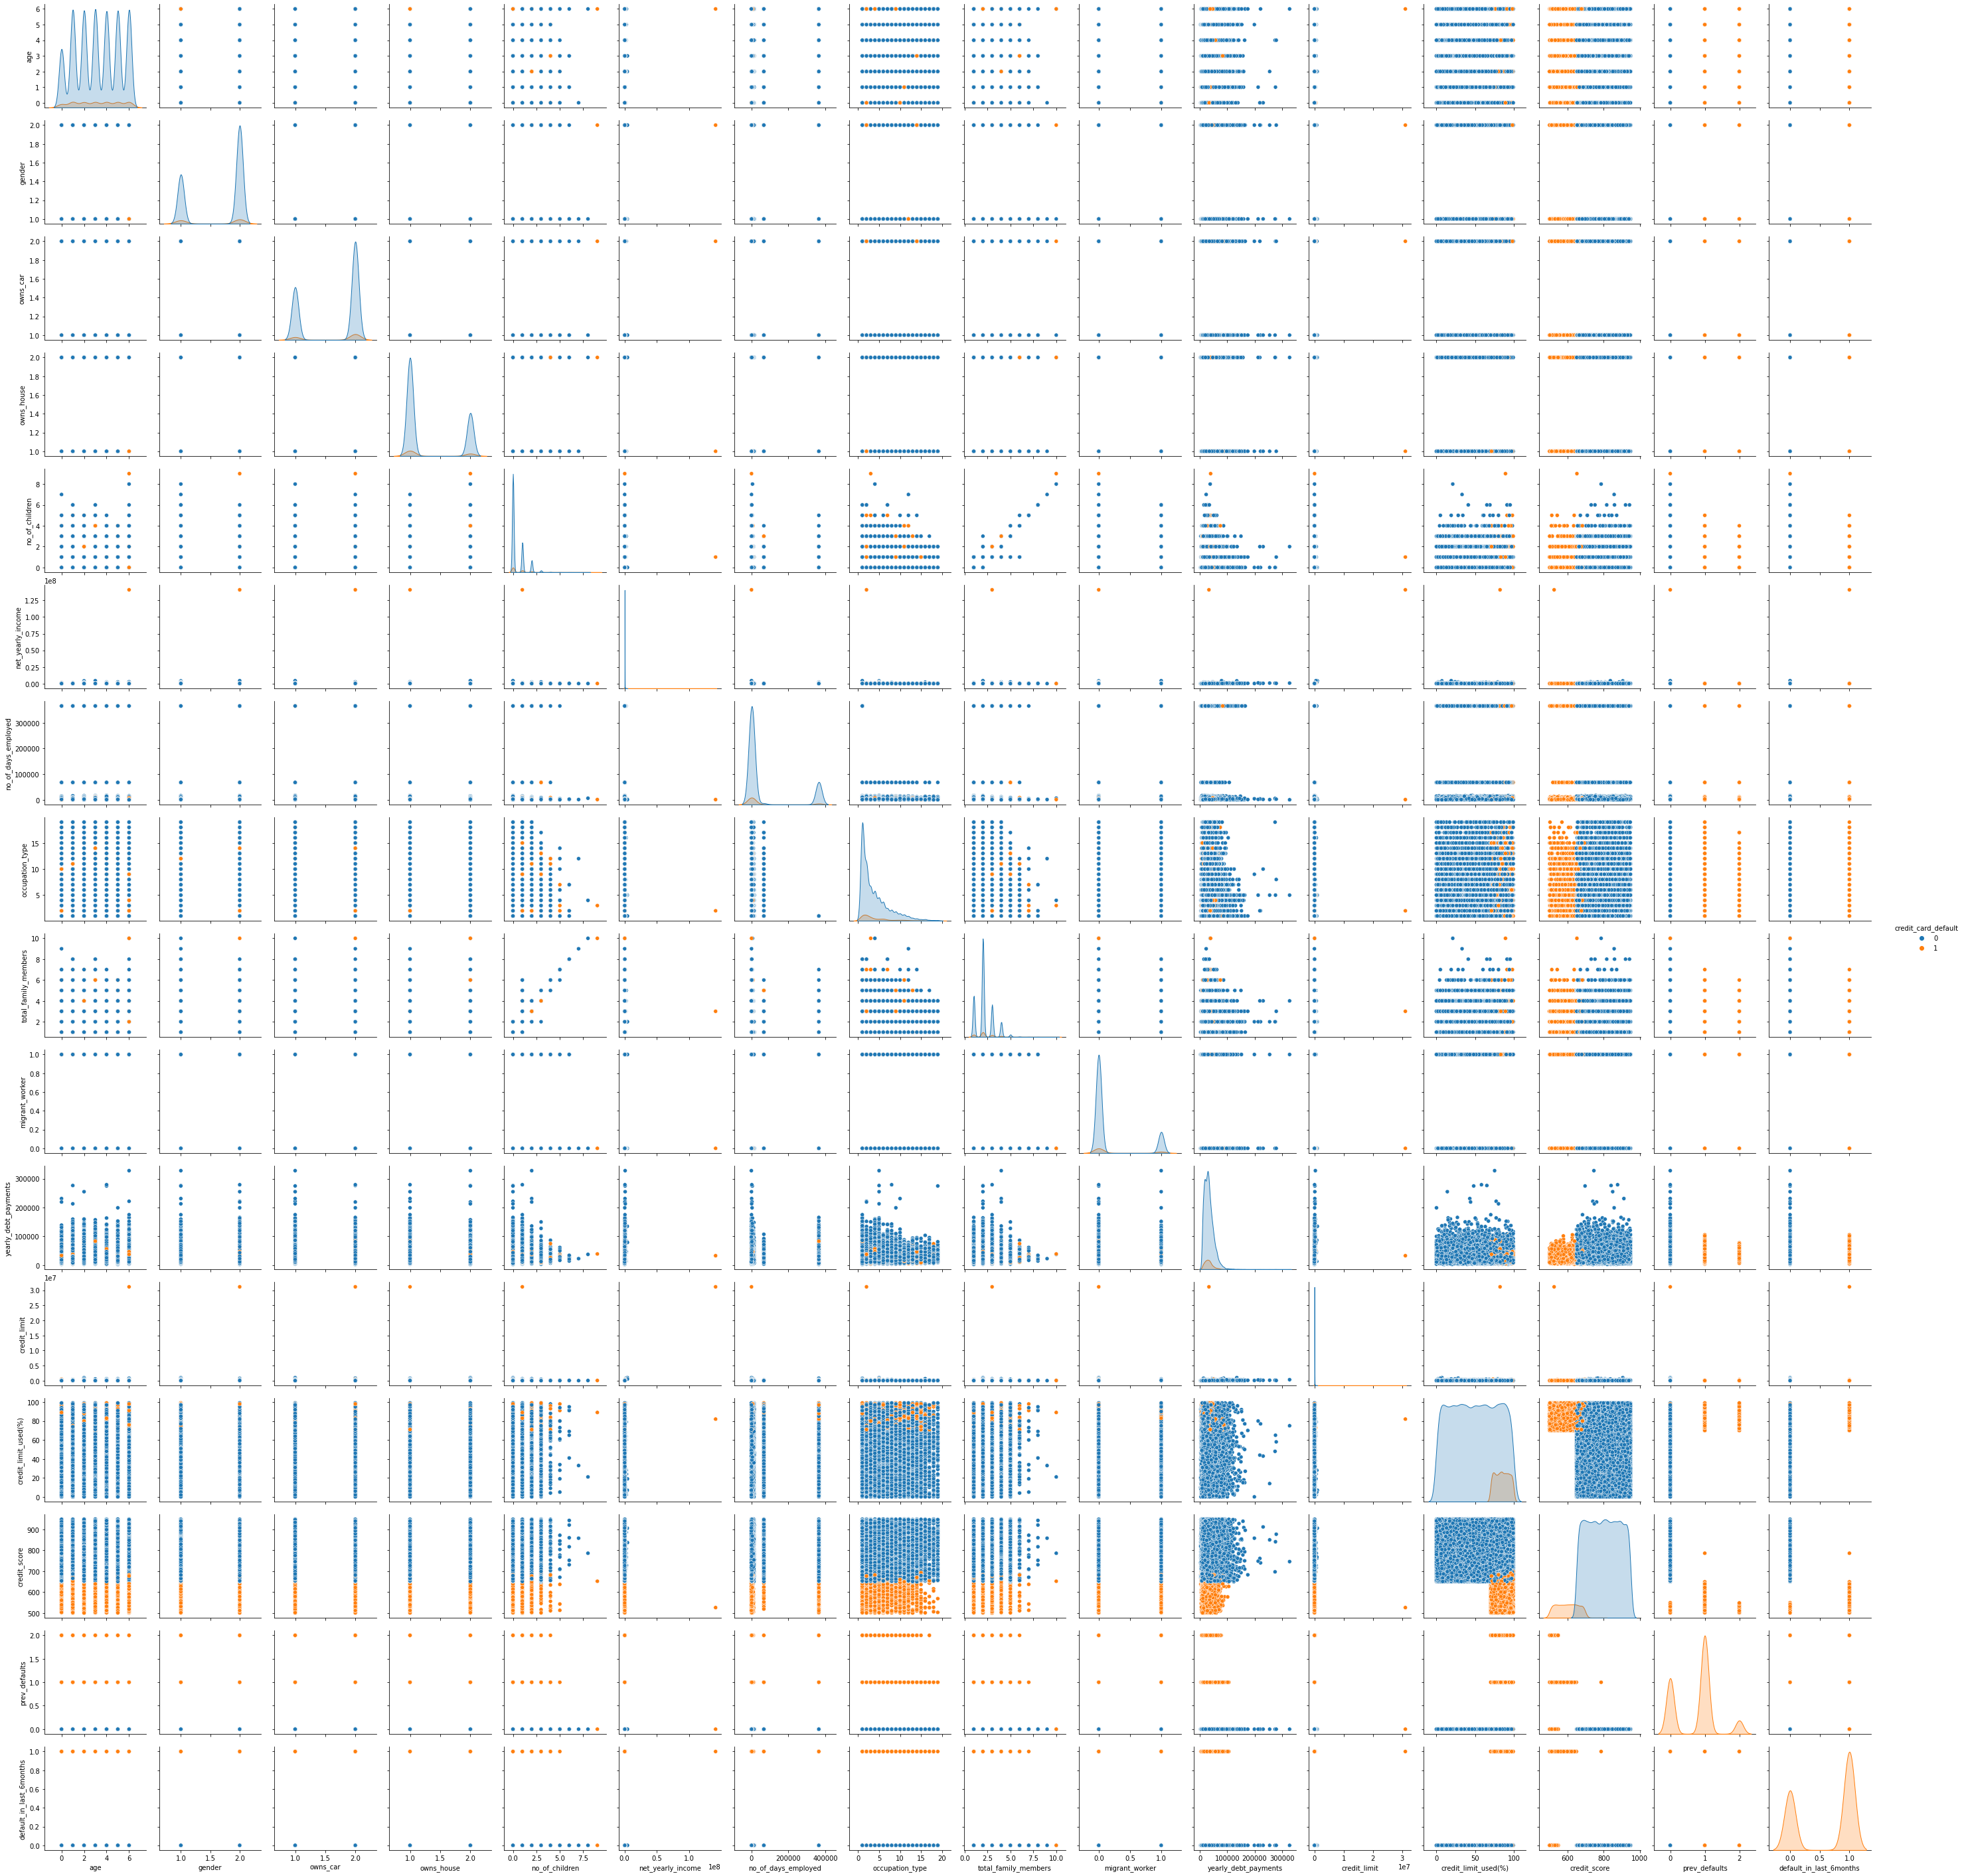

In [ ]:
#data visualization
sns.pairplot(train,size=2.5,hue='credit_card_default')

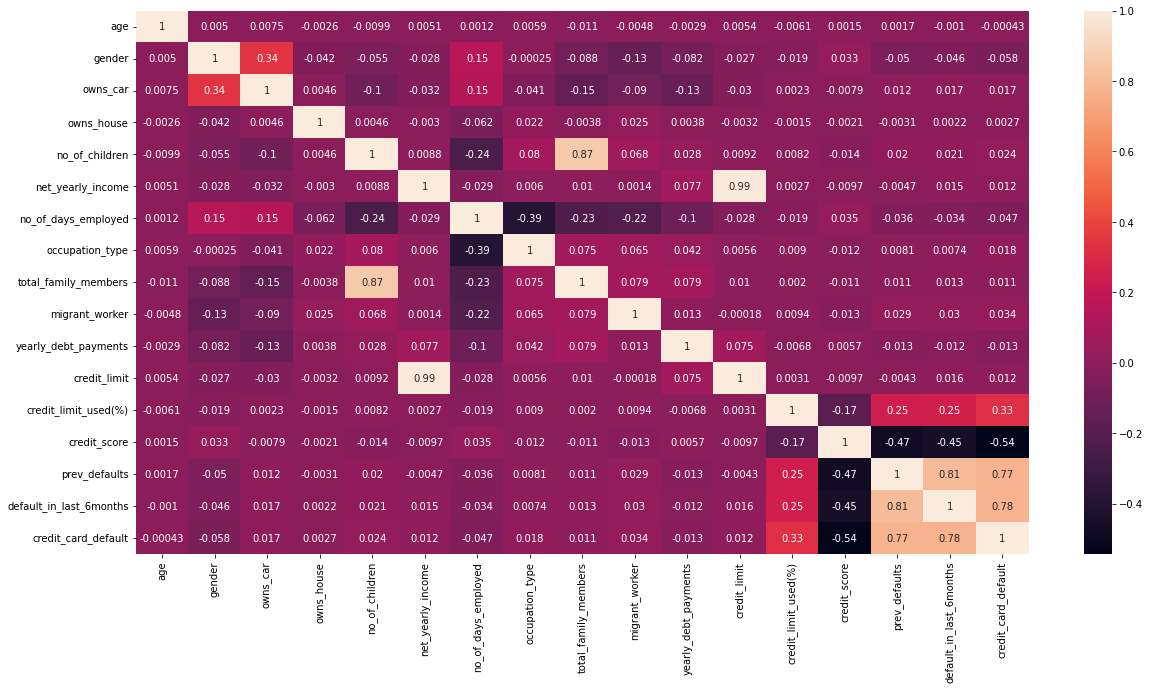

In [ ]:
# #correlation heatmap 
plt.subplots(figsize=(20,10))
sns.heatmap(train.corr(method='pearson'),annot=True) #for linear data

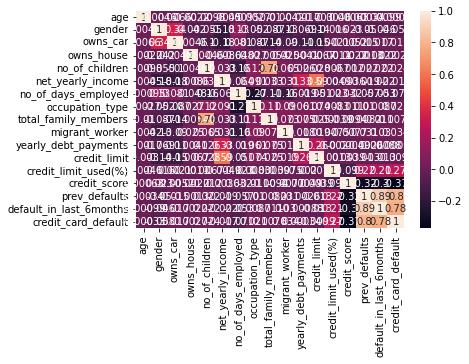

In [ ]:
# plt.subplots(figsize=(20,10))
sns.heatmap(train.corr(method='kendall'),annot=True) #for non-linear data 

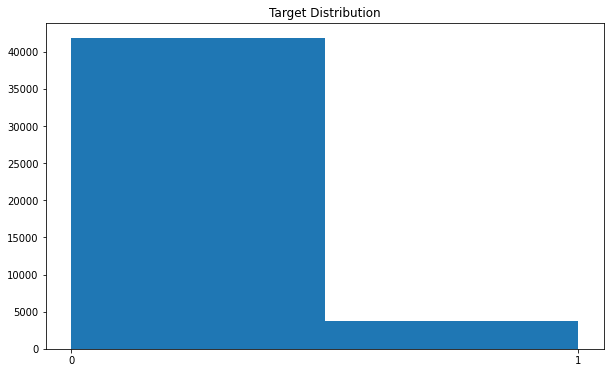

In [ ]:
# The data is highly imbalanced
plt.figure(figsize=(10,6))
plt.hist(train['credit_card_default'], bins=2)
plt.title('Target Distribution')
plt.xticks([0,1])
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


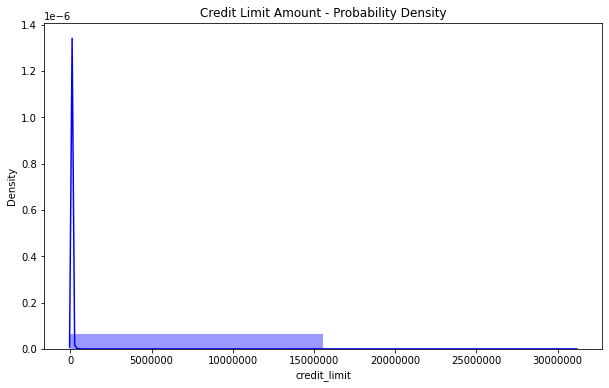

In [ ]:
# Distribution of limit balance
plt.figure(figsize = (10,6))
plt.title('Credit Limit Amount - Probability Density')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(train['credit_limit'],kde=True,bins=2, color="blue")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


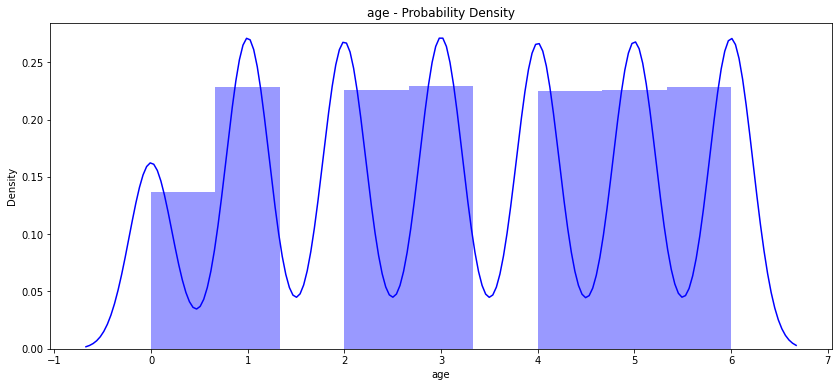

In [ ]:
# Distribution of limit balance
plt.figure(figsize = (14,6))
plt.title('age - Probability Density')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(train['age'],kde=True,bins=9, color="blue")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


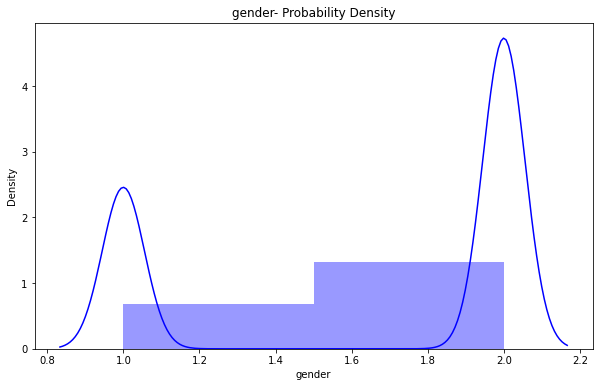

In [ ]:
# Distribution of limit balance
plt.figure(figsize = (10,6))
plt.title('gender- Probability Density')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(train['gender'],kde=True,bins=2, color="blue")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


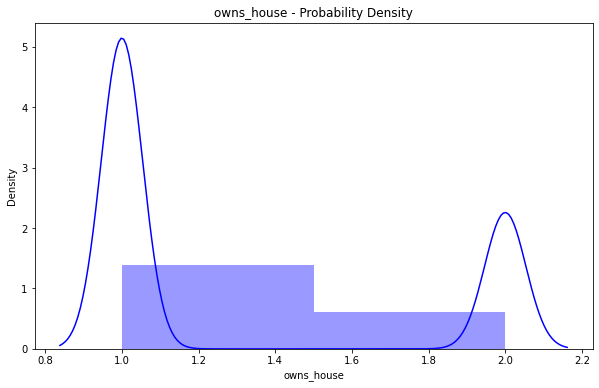

In [ ]:
# Distribution of limit balance
plt.figure(figsize = (10,6))
plt.title('owns_house - Probability Density')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(train['owns_house'],kde=True,bins=2, color="blue")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


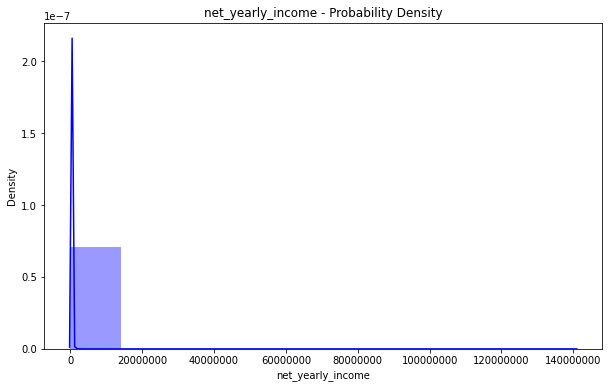

In [ ]:
# Distribution of limit balance
plt.figure(figsize = (10,6))
plt.title('net_yearly_income - Probability Density')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(train['net_yearly_income'],kde=True,bins=10, color="blue")
plt.show();

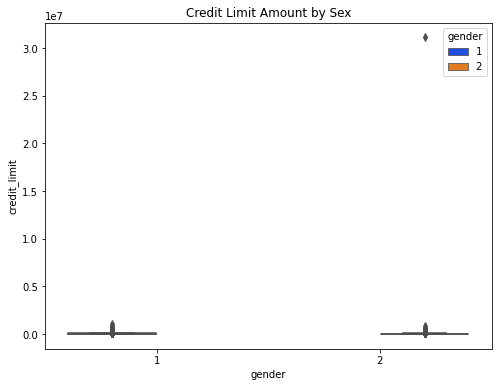

In [ ]:
# Credit Limit vs Sex
plt.figure(figsize = (8,6))
plt.title('Credit Limit Amount by Sex')
# plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='gender', y='credit_limit', hue='gender', data=train, palette='bright')
plt.show();

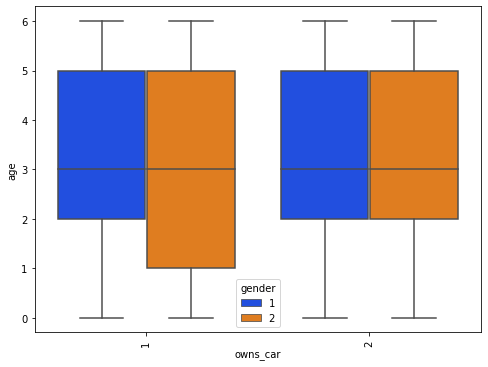

In [ ]:
# Marriage, Age, and Sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=train, palette='bright')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_variation('owns_car', 'age', 'gender', 8)


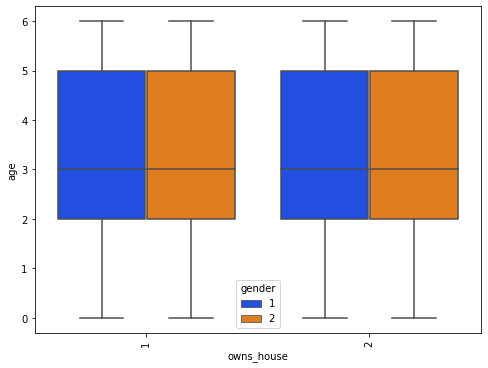

In [ ]:
# Marriage, Age, and Sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=train, palette='bright')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_variation('owns_house', 'age', 'gender', 8)


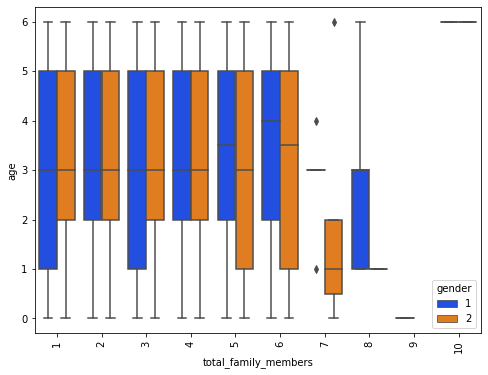

In [ ]:
# Marriage, Age, and Sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=train, palette='bright')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_variation('total_family_members', 'age', 'gender', 8)


In [ ]:
test1.shape

(11383, 16)

In [ ]:
train.shape

(45528, 19)

In [ ]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,5,2,2,1,0,107934.04,612.0,1,1,1,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,1,1,2,1,0,109862.62,2771.0,2,2,0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,3,1,2,1,0,230153.17,204.0,2,2,0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,3,2,2,1,0,122325.82,11941.0,4,2,0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,5,1,1,1,0,387286.00,1459.0,4,1,0,38282.95,52950.64,75,927.0,0,0,0


In [ ]:
# train.to_csv('train.csv', index=False) 

In [ ]:
train.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [ ]:
train.shape

(45528, 19)

In [ ]:
X = train.drop(['customer_id', 'name','credit_card_default'],axis=1)
y = train['credit_card_default']

In [ ]:
#SELECT KBEST METHOD FOR FEATURE SELECTION
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif,f_classif, f_regression

best = SelectKBest(score_func = f_classif,k=10)
fit = best.fit(X,y)
score = pd.DataFrame(fit.scores_)

col = pd.DataFrame(X.columns)

score = pd.concat([col,score],axis=1)
score.columns = ['Attribute','Score']

print(score.nlargest(20,'Score'))


                  Attribute         Score
15  default_in_last_6months  68946.205369
14            prev_defaults  67030.178216
13             credit_score  19045.152912
12     credit_limit_used(%)   5437.535811
1                    gender    151.359406
6       no_of_days_employed    100.008957
9            migrant_worker     51.621675
4            no_of_children     25.271421
7           occupation_type     15.237732
2                  owns_car     12.686734
10     yearly_debt_payments      7.784570
11             credit_limit      6.832340
5         net_yearly_income      6.030379
8      total_family_members      5.251764
3                owns_house      0.330142
0                       age      0.008530


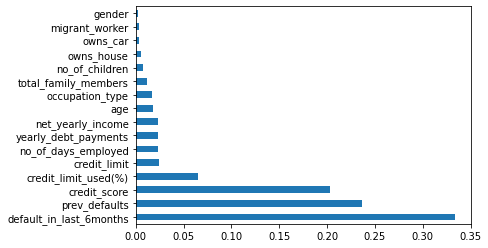

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_)
imp = pd.Series(model.feature_importances_,index= X.columns)
imp.nlargest(16).plot(kind='barh')
plt.show()

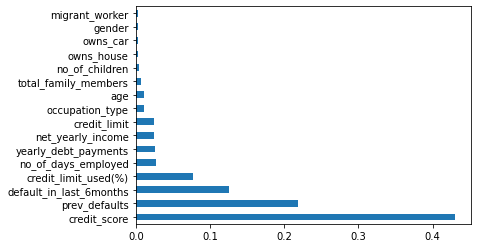

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=100, random_state=62)
model.fit(X, y)
#print(model.feature_importances_)
imp = pd.Series(model.feature_importances_,index= X.columns)
imp.nlargest(16).plot(kind='barh')
plt.show()

In [ ]:

X = train[[ 
            'default_in_last_6months', 'prev_defaults','credit_score','credit_limit_used(%)',
            'credit_limit','no_of_days_employed','net_yearly_income','yearly_debt_payments',
            'occupation_type','age',
            # 'total_family_members',
            # 'no_of_children',
            # 'owns_house',
            # 'migrant_worker',
            # 'owns_car',
            # 'gender',
           
      ]]

test2 = test1[[ 
            'default_in_last_6months', 'prev_defaults','credit_score','credit_limit_used(%)',
            'credit_limit','no_of_days_employed','net_yearly_income','yearly_debt_payments',
            'occupation_type','age',
            # 'total_family_members',
            # 'no_of_children',
            # 'owns_house',
            # 'migrant_worker',
            # 'owns_car',
            # 'gender',
        ]]


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
test2=min_max_scaler.fit_transform(test2)

In [ ]:
# from imblearn.under_sampling import NearMiss
# nm= NearMiss()
# X,y = nm.fit_resample(X,y)

In [ ]:
# from imblearn.over_sampling import SMOTE
# import numpy as np
# sm = SMOTE(random_state=12)
# X, y = sm.fit_resample(X, y)


In [ ]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =12 )

In [ ]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred=model_tree.predict(X_test)
# print(classification_report(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", f1_score(y_test, y_pred, average='macro'))

credit = model_tree.predict(test2)
df = pd.DataFrame()
df['customer_id'] = test['customer_id']
df['credit_card_default'] = credit 
df.to_csv('new_submission.csv', index=False) 

ACCURACY OF THE MODEL:  0.9130681989392794
